# Case study on Pre-processing

### Do the following on titanic dataset.

1. Load the dataset into python environment 

2. Make ‘PassengerId’ as the index column

3. Check the basic details of the dataset

4. Fill in all the missing values present in all the columns in the dataset

5. Check and handle outliers in at least 3 columns in the dataset

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Load the dataset into python environment 

In [2]:
data = pd.read_csv("titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Make ‘PassengerId’ as the index column

In [6]:
data =  pd.read_csv('titanic_dataset.csv', index_col= 'PassengerId')

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [8]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
data.shape

(891, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Findings

1. This dataset contain 891 rows and 11 columns. 

2. Dataset contain both categorical and numerical features.
   * Categorical features : Survived, sex, and Embarked.  Ordinal : pclass
   * Continous : Age, Fare Discrete: sibsp, parch

3. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

4. Cabin, Age, Embarked features contain number of null values in the dataset.

5. Seven features are Integer or floats data types. Five features are string(object)


### Stastical details

In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

### Findings

1. Names are unique across the dataset (count= 891)
2. Sex variable as two possible values.(Female , Male)
3. Ticket feature has high ratio of unique values.(681)


## Gender Count

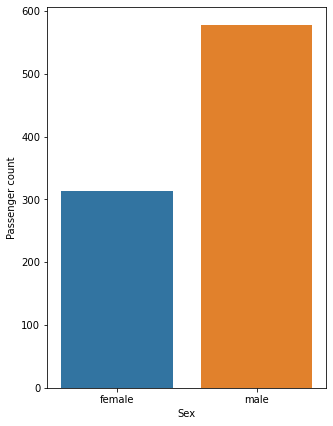

In [14]:
d1 = data.Sex.value_counts().sort_index()
plt.figure(figsize=(5,7))
sns.barplot(d1.index, d1.values)
plt.xlabel('Sex')
plt.ylabel('Passenger count')
plt.show()

* Majority of them are Male.

## Sex vs Survived

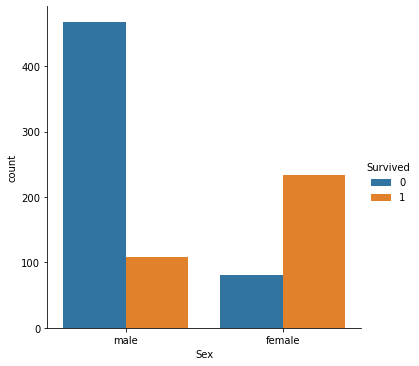

In [15]:
sns.catplot(x = "Sex",  hue="Survived", kind ="count", data= data)

In [16]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%.

## Age vs Survived 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

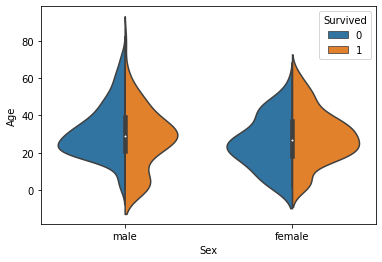

In [17]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True)

In [18]:
data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

1. Good for children.
2. High for women in the age range 20-50.
3. Less for men as the age increases.


## Categorical Count Plots for Embarked Feature  

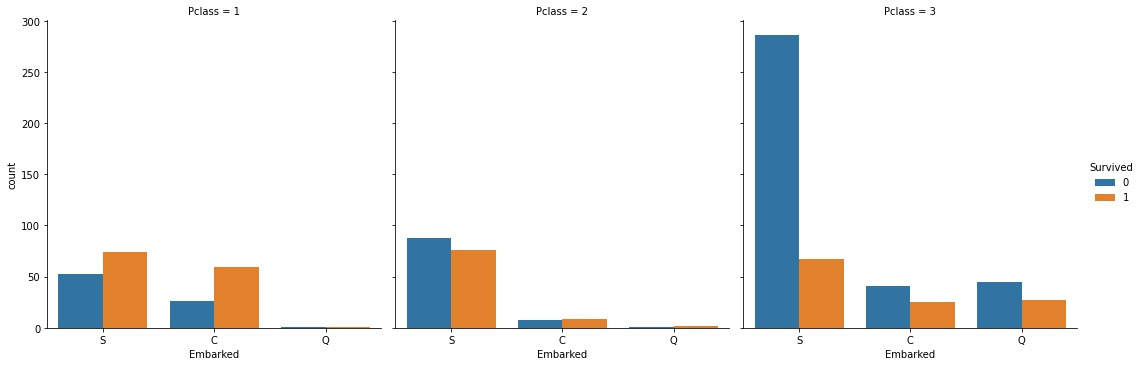

In [19]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = data)

* Majority of the passengers boarded from S. So, the missing values can be filled with S.
* Majority of them are from 3rd class

## Pclass -Survival probability

In [20]:
data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

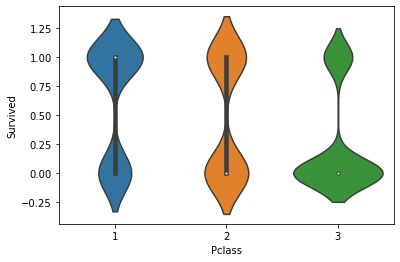

In [21]:
sns.violinplot(x ="Pclass", y ="Survived",
data = data)

* From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

## Pclass vs Fare

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

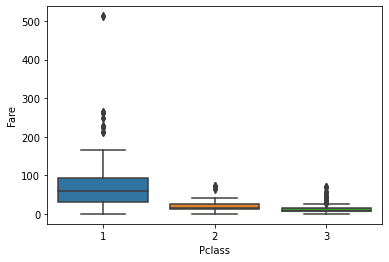

In [22]:
sns.boxplot(x='Pclass',y='Fare',data=data)

## SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

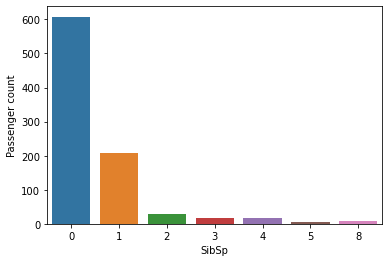

In [23]:
d1 = data.SibSp.value_counts().sort_index()
sns.barplot(d1.index, d1.values)
plt.xlabel('SibSp')
plt.ylabel('Passenger count')

* As we can see, majority of them have no Siblings/Spouse.

In [24]:
data[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


* The passengers having one sibling/spouse has more survival probability.
* '1' > '2' > '0' > '3' > '4'

## Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

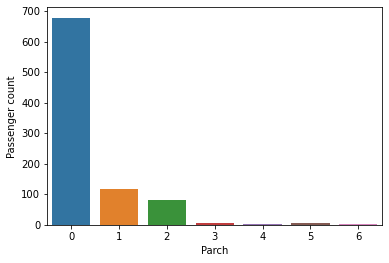

In [25]:
d1 = data.Parch.value_counts().sort_index()
sns.barplot(d1.index, d1.values)
plt.xlabel('Parch')
plt.ylabel('Passenger count')

* As we can see, majority of them have no Children/Parents.

* The passengers having three children/parents has more survival probability.

# 4. Fill in all the missing values present in all the columns in the dataset

### Visualizing the missing values

<AxesSubplot:ylabel='PassengerId'>

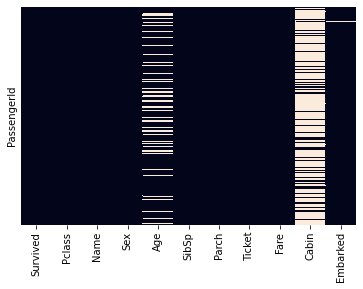

In [26]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False)

In [27]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### In this dataset feature cabin have more than 50% of missing value,so it is better to drop this column.

In [28]:
data.drop("Cabin", axis=1, inplace= True)

In [29]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Histogram of float datatype features


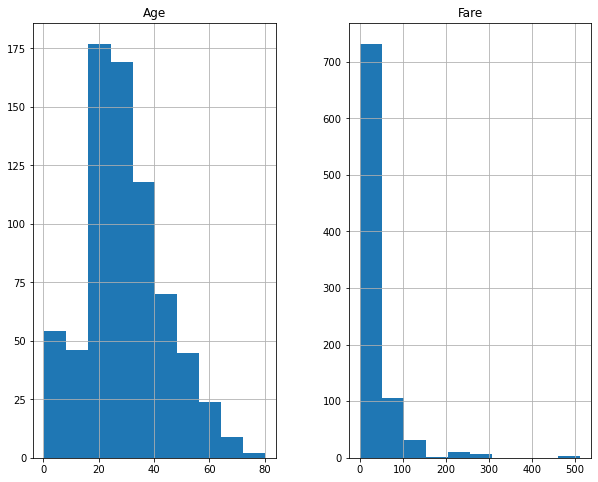

In [30]:
fraqgraph = data.select_dtypes(include=["float"])
fraqgraph.hist(figsize=(10,8))
plt.show()

### Data Filling

In [31]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [32]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [33]:
data.Embarked.mode()

0    S
dtype: object

In [34]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().iloc[0])

In [35]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [36]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


# 5. Check and handle outliers in at least 3 columns in the dataset

## Checking and handling outliers in SibSp(Siblings/Spouse)

Text(0.5, 1.0, 'Box plot of SibSp')

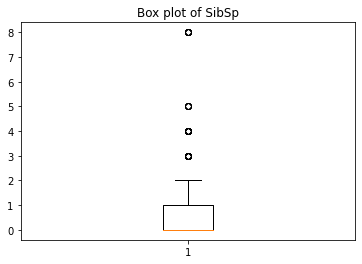

In [37]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Finding different quartile values of SibSp.

In [38]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [39]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [40]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  -1.5
Upper limit =  2.5


Removing values which lessthan and greater than the upper limit and lower limit

In [41]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [42]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

Finding the index of these values

In [43]:
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [44]:
data.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864], inplace = True)

Text(0.5, 1.0, 'Box plot of SibSP after handling outliers')

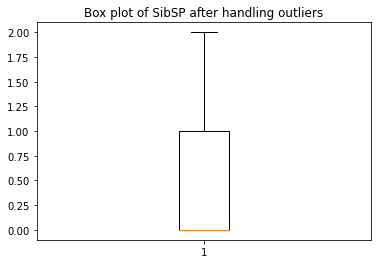

In [45]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSP after handling outliers')

### Checking and handling outliers in Age

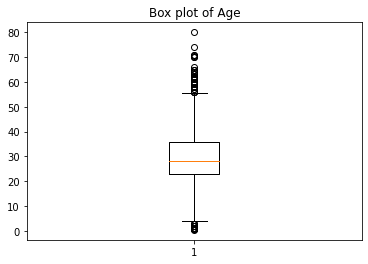

In [46]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

Finding different quartile values of Age.

In [47]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [48]:
print(Q1)
print(Q2)
print(Q3)

23.0
28.0
36.0


In [49]:
data['Age'].median()

28.0

In [50]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  3.5
Upper limit =  55.5


Removing values which lessthan and greater than the upper limit and lower limit

In [51]:
outlier = []
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [52]:
outlier

[58.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 3.0,
 60.0,
 1.0,
 3.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

Finding the index of these values

In [53]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
           dtype='int64', name='PassengerId')

In [54]:
data.drop([ 12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880], inplace = True)

Text(0.5, 1.0, 'Box plot of Age after handling outliers')

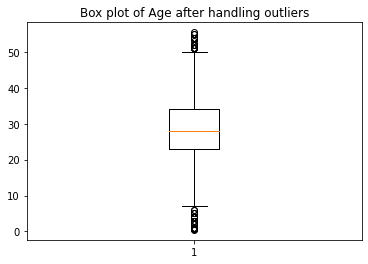

In [55]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age after handling outliers')

### Checking and handling outliers in Fare

Text(0.5, 1.0, 'Box plot of Fare')

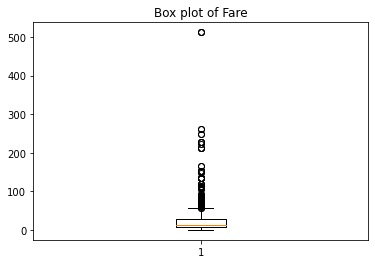

In [56]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

Finding different quartile values of Fare.

In [57]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [58]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.825


In [59]:
data['Fare'].median()

13.0

In [60]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  -21.997999999999998
Upper limit =  57.7188


Removing values which lessthan and greater than the upper limit and lower limit

In [61]:
outlier = []
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [62]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [63]:
ind1 = data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=104)

In [64]:
data.drop([ 2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 
           225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 
           312, 319, 320, 326, 330, 333, 335, 337, 338, 370, 374, 376, 378, 381, 386, 391, 
           394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 514, 521, 524, 528, 538, 
           541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 
           680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 
           790, 803, 821, 836, 850, 857], inplace = True)

Text(0.5, 1.0, 'Box plot of Fare after handling outliers')

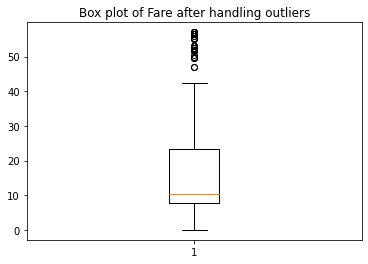

In [65]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare after handling outliers')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [66]:
data.shape

(702, 10)

In [67]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [68]:
data.Name.nunique()

702

### Dropping unwanted columns

In [69]:
data.drop('Name', axis=1, inplace= True)

In [70]:
data.drop('Ticket', axis=1, inplace= True)

### Data transformation for model use

#### For logistic regression
 
   * One hot encoding pd.get_dummies()

In [71]:
data = pd.get_dummies(data, columns = ["Pclass","Sex", "Embarked"])

In [72]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0


<AxesSubplot:>

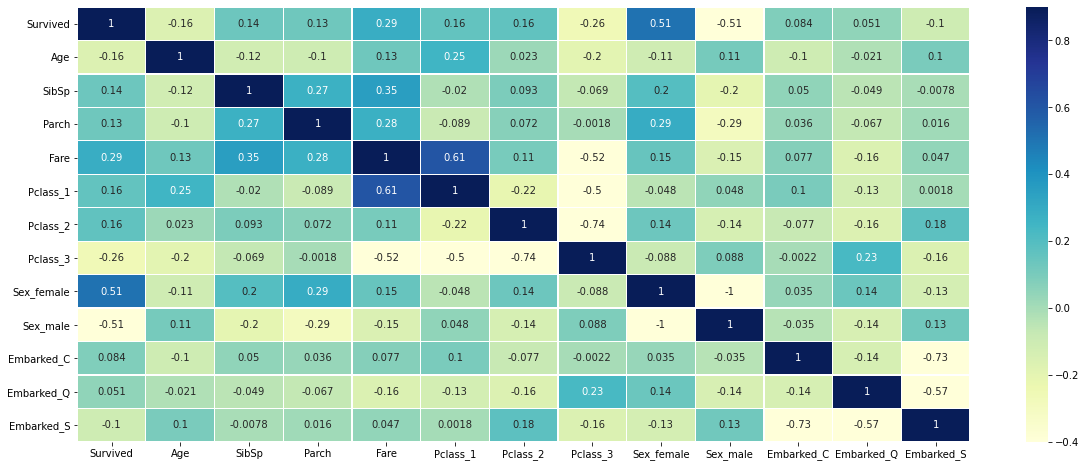

In [73]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')

In [74]:
y = data['Survived']
x = data.drop("Survived", axis =1)

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [76]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)


In [77]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.15220279092438813


In [78]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

R squared value is : 0.3642975448807225


## Min max scaling

In [79]:
x = data.drop("Survived", axis =1)

In [80]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,28.139245,0.282051,0.287749,16.414606,0.128205,0.240741,0.631054,0.313390,0.686610,0.149573,0.096866,0.753561
std,10.282928,0.512544,0.762789,12.547668,0.334556,0.427838,0.482863,0.464202,0.464202,0.356906,0.295986,0.431244
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.250000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,0.000000,23.250000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,55.500000,2.000000,6.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
from sklearn import preprocessing

In [82]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [83]:
x = min_max.fit_transform(x)

In [84]:
x = pd.DataFrame(x)

In [85]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.503254,0.141026,0.047958,0.287976,0.128205,0.240741,0.631054,0.313390,0.686610,0.149573,0.096866,0.753561
std,0.186691,0.256272,0.127131,0.220135,0.334556,0.427838,0.482863,0.464202,0.464202,0.356906,0.295986,0.431244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396333,0.000000,0.000000,0.138232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.500726,0.000000,0.000000,0.184211,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.591503,0.500000,0.000000,0.407895,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.1516097589587489
R squared value is : 0.3667744500296456


In [89]:
predictions

array([ 0.49609375,  0.70898438,  0.1484375 , -0.05664062,  0.13867188,
        0.59570312,  0.08007812,  0.62695312,  0.21289062,  0.27539062,
        0.07617188,  0.47070312,  0.24804688,  0.51757812,  0.46679688,
        0.83203125,  0.39257812,  0.08007812,  0.13476562,  0.12890625,
        0.79882812,  0.29882812,  0.13476562,  0.07226562,  1.08203125,
        0.08398438,  0.03710938,  0.55664062,  0.19335938,  0.125     ,
        0.17382812,  0.11132812,  0.13867188,  0.08007812,  0.08007812,
        0.58789062,  0.08007812,  0.60351562,  0.08789062,  0.13867188,
        0.05664062,  0.33398438,  0.17773438,  0.52734375, -0.03320312,
        0.48632812,  0.44335938,  0.53710938,  0.19335938,  0.12304688,
        0.69335938,  0.17382812,  0.22851562,  0.59960938,  0.60351562,
        0.96289062,  0.32617188,  0.46679688,  0.02148438, -0.02148438,
        0.60351562,  0.50390625,  0.48242188,  0.70898438,  0.31054688,
        0.59570312,  0.16210938,  0.42773438,  0.15820312,  0.13